# PyRoot Exercise - João Pedro Gomes Pinheiro (jgomespi)

Jupyter notebook criado com as soluções dos problemas propostos na aula de PyROOT no curso de Introdução à Análise de Dados (UERJ-2020-2).

Iniciamos com os imports necessários para a execução das tarefas. Parte do código foi copiado da aula, com base numa adaptação do MakeSelector, proveniente do C++/ROOT. Os pontos onde foram acrescentados comandos são explicados. As tarefas são exatamente as mesmas propostas para a implementação em C++/ROOT, portanto alguns detalhes não serão explicados em tantos detalhes aqui, visto que já foram explicados na documentação relacionada à implementação C++/ROOT.

In [1]:
import ROOT

Welcome to JupyROOT 6.22/03


Agora abriremos o arquivo (experiment.root) e pegaremos a tree de interesse (tree1).

In [2]:
# Open the file. Note that the name of your file outside this class
# will probably NOT be experiment.root.
myfile = ROOT.TFile( 'data/experiment.root' )
# Retrieve the n-tuple of interest. In this case, the n-tuple's name is
# "tree1". You may have to use the TBrowser to find the name of the
# n-tuple that someone gives you.
mychain = ROOT.gDirectory.Get( 'tree1' )
entries = mychain.GetEntriesFast()

Abaixo utilizamos a parte "Set-up", da adaptação ao MakeSelector, para ler a variável chi2 de tree1. Criamos o histograma chi2Hist e o preenchemos com a variável chi2. No método Draw, usamos a opção "E1" para incluir barras de erro. 

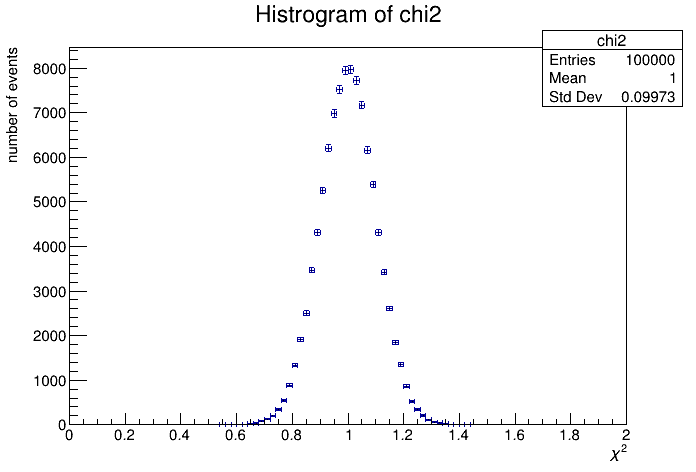

In [3]:
chi2Hist = ROOT.TH1D("chi2","Histrogram of chi2", 100, 0, 2)

for jentry in range( entries ):
    nb = mychain.GetEntry( jentry )
    chi2 = mychain.chi2
    chi2Hist.Fill(chi2)
    if nb <= 0:
        continue

canvas = ROOT.TCanvas()
chi2Hist.GetXaxis().SetTitle("#\chi^2")
chi2Hist.GetYaxis().SetTitle("number of events")
chi2Hist.Draw('E1')
canvas.Draw()

De forma semelhante, criaremos um histograma ebeamHist e o preenchemos com a variável ebeam, de tree1, com barras de erro.

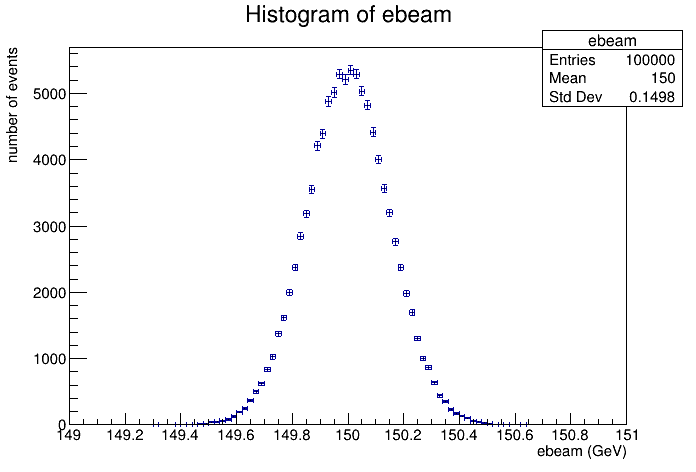

In [4]:
ebeamHist = ROOT.TH1D("ebeam","Histogram of ebeam", 100, 149., 151.)

for jentry in range( entries ):
    nb = mychain.GetEntry( jentry )
    ebeam = mychain.ebeam
    ebeamHist.Fill(ebeam)
    if nb <= 0:
        continue

canvas_ebeam = ROOT.TCanvas()
ebeamHist.GetXaxis().SetTitle("ebeam (GeV)")
ebeamHist.GetYaxis().SetTitle("number of events")
ebeamHist.Draw('E1')
canvas_ebeam.Draw()

Agora, vamos ajustar uma distribuição gaussiana ao Histrograma ebeamHist:

 FCN=71.0795 FROM MIGRAD    STATUS=CONVERGED      62 CALLS          63 TOTAL
                     EDM=4.98532e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.32687e+03   2.06188e+01   6.98547e-02  -1.63547e-06
   2  Mean         1.49999e+02   4.73759e-04   7.15253e-05   4.81175e-03
   3  Sigma        1.49688e-01   3.34201e-04   2.51907e-06  -4.66426e-02


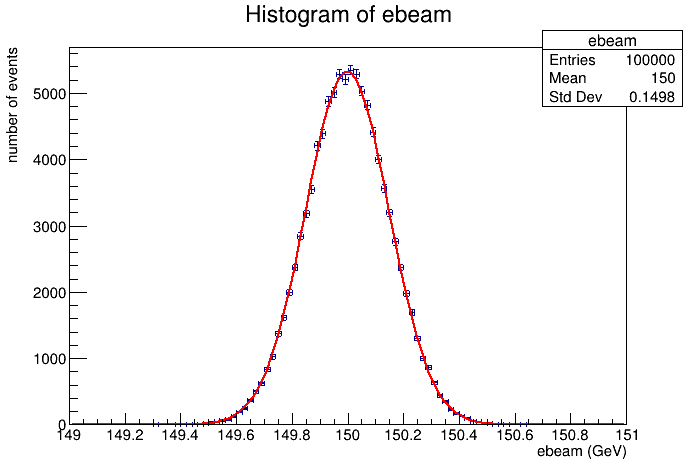

In [5]:
ebeamHist.Fit("gaus", "")
canvas_ebeam.Draw()

Agora vamos utilizar uma estrutura parecida com as anteriores para desenhar um plot de espalhamento das variáveis ebeam e chi2. Veremos que não são correlacionadas.

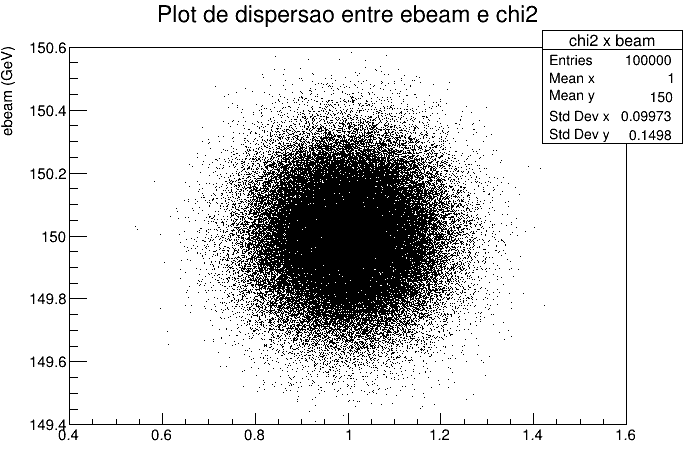

In [6]:
ScatterHist = ROOT.TH2F("chi2 x beam", "Plot de dispersao entre ebeam e chi2", 100, 0.4, 1.6, 100, 149.4, 150.6)

for jentry in range( entries ):
    # Copy next entry into memory and verify.
    nb = mychain.GetEntry( jentry )
    ebeam = mychain.ebeam
    chi2 = mychain.chi2
    ScatterHist.Fill(chi2,ebeam)
    if nb <= 0:
        continue
        
canvas_Scatter = ROOT.TCanvas()
ScatterHist.GetXaxis().SetTitle("\chi^2")
ScatterHist.GetYaxis().SetTitle("ebeam (GeV)")
ScatterHist.Draw()
canvas_Scatter.Draw()

Vamos calcular o $p_T$, dado por $\sqrt{p_x^2 + p_y^2}$ e plotar em um histograma:

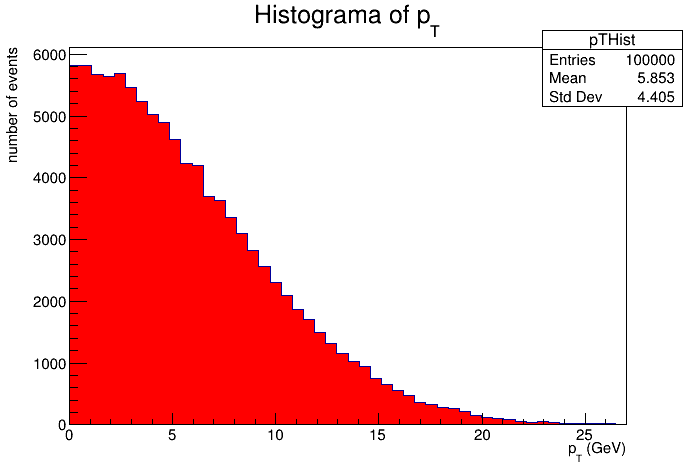

In [7]:
pTHist = ROOT.TH1D("pTHist","Histograma of p_{T}", 50, 0, 27)

for jentry in range( entries ):
    # Copy next entry into memory and verify.
    nb = mychain.GetEntry( jentry )
    px = mychain.px
    py = mychain.py
    pt = ( px**2 + py**2 )**0.5
    pTHist.Fill(pt)
    if nb <= 0:
        continue
        
canvas_pt = ROOT.TCanvas()
pTHist.GetXaxis().SetTitle("p_{T} (GeV)")
pTHist.GetYaxis().SetTitle("number of events")
pTHist.SetFillColor(2)
pTHist.Draw()
canvas_pt.Draw()

Agora vamos calcular $\theta$, dado por $arctan\left(\dfrac{p_T}{p_Z}\right)$ e plotar num histograma.

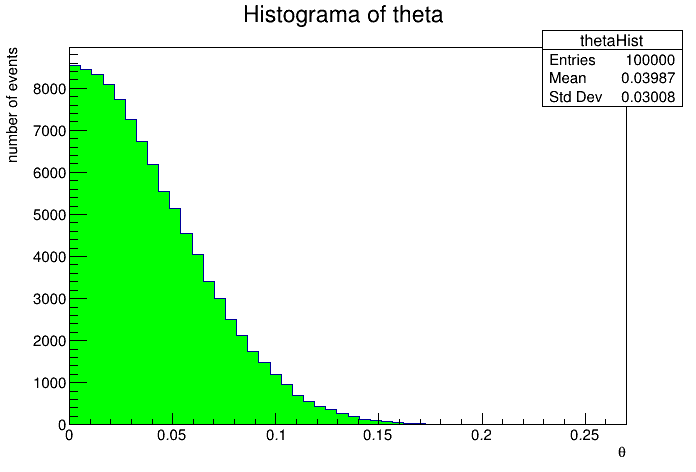

In [8]:
thetaHist = ROOT.TH1D("thetaHist","Histograma of theta ", 50, 0, 0.27)

for jentry in range( entries ):
    # Copy next entry into memory and verify.
    nb = mychain.GetEntry( jentry )
    px = mychain.px
    py = mychain.py
    pz = mychain.pz
    pt = ( px**2 + py**2 )**0.5
    theta = ROOT.TMath.ATan(pt/pz)
    thetaHist.Fill(theta)
    if nb <= 0:
        continue

canvas_theta = ROOT.TCanvas()
thetaHist.GetXaxis().SetTitle("#theta")
thetaHist.GetYaxis().SetTitle("number of events")
thetaHist.SetFillColor(3)
thetaHist.Draw()
canvas_theta.Draw()

Agora, vamos contar quantos eventos possuem $p_z< 145,0$ GeV. Vamos utilizar o método GetEntries, que nos retorna quantas entradas tem no histrograma da $p_z$ preenchido apenas com valores menores que 145,0 GeV.

The number of events with p_z < 145 is 14962.0


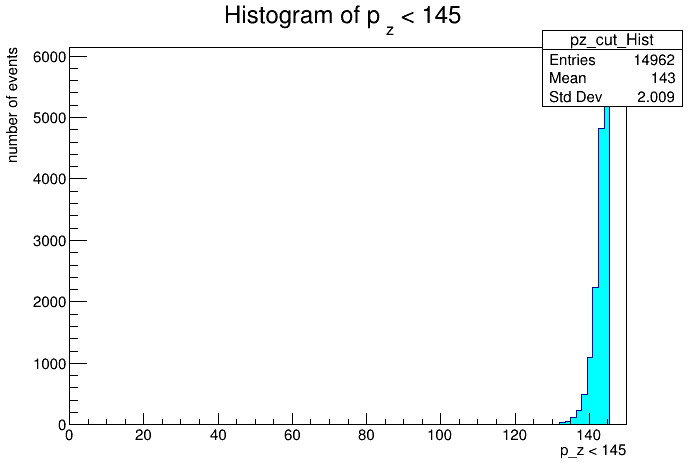

In [9]:
pz_cut_Hist = ROOT.TH1D("pz_cut_Hist","Histogram of p_{z} < 145 ", 100, 0, 150)

for jentry in range( entries ):
    nb = mychain.GetEntry( jentry )
    pz = mychain.pz
    if pz < 145.:
        #print(theta)
        pz_cut_Hist.Fill(pz)
    if nb <= 0:
        continue

canvas_pz_count = ROOT.TCanvas()
pz_cut_Hist.GetXaxis().SetTitle("p_z < 145")
pz_cut_Hist.GetYaxis().SetTitle("number of events")
pz_cut_Hist.SetFillColor(7)
pz_cut_Hist.Draw()
canvas_pz_count.Draw()
print("The number of events with p_z < 145 is", pz_cut_Hist.GetEntries())

Porfim, gravamos os histogramas num arquivo.root

In [10]:
file = ROOT.TFile("experiment-output.root","recreate")
chi2Hist.Write()
ebeamHist.Write()
ScatterHist.Write()
pTHist.Write()
pz_cut_Hist.Write()
file.Write()
file.Close()